C:\Users\banny\AppData\Local\Temp\ipykernel_1936\928564001.py:12: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv("household_power_consumption.txt",
C:\Users\banny\AppData\Local\Temp\ipykernel_1936\928564001.py:12: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv("household_power_consumption.txt",
C:\Users\banny\AppData\Local\Temp\ipykernel_1936\928564001.py:12: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("household_power_consumption.txt",
C:\Users\banny\AppData\Local\Temp\ipykernel_1936\928564001.py:12: UserWarning: Parsing dates in 

                    Global_active_power Global_reactive_power  Voltage  \
datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.000          

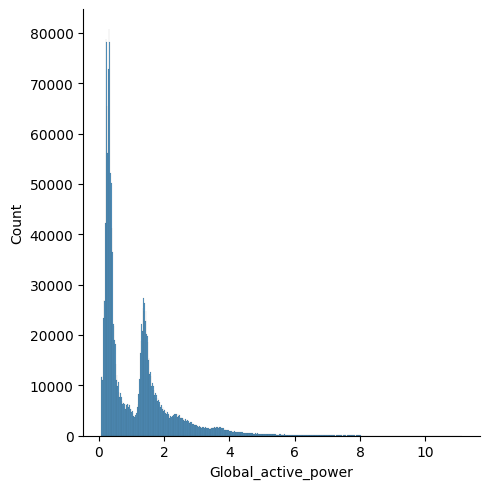

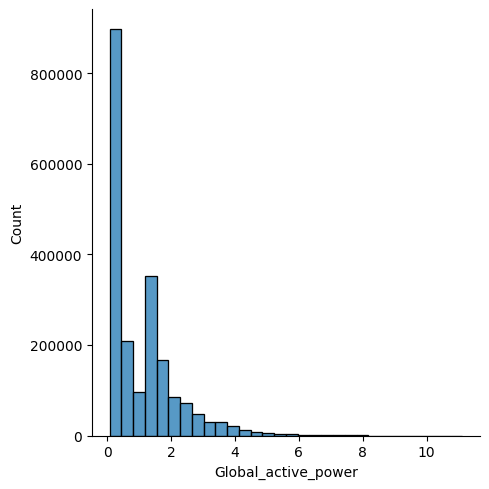

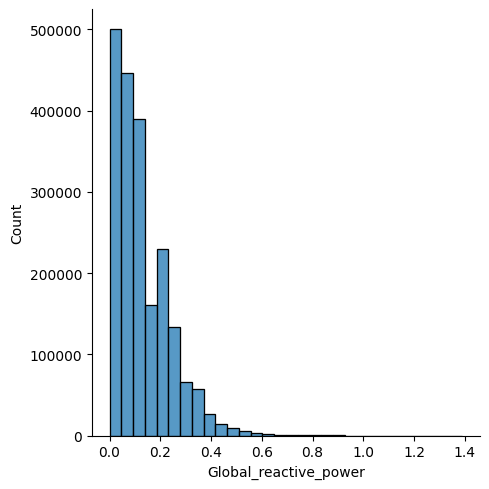

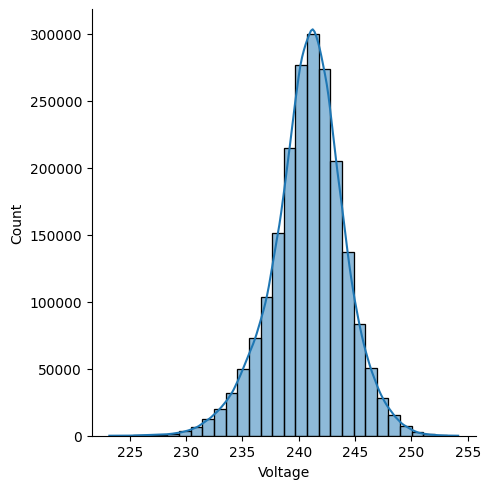

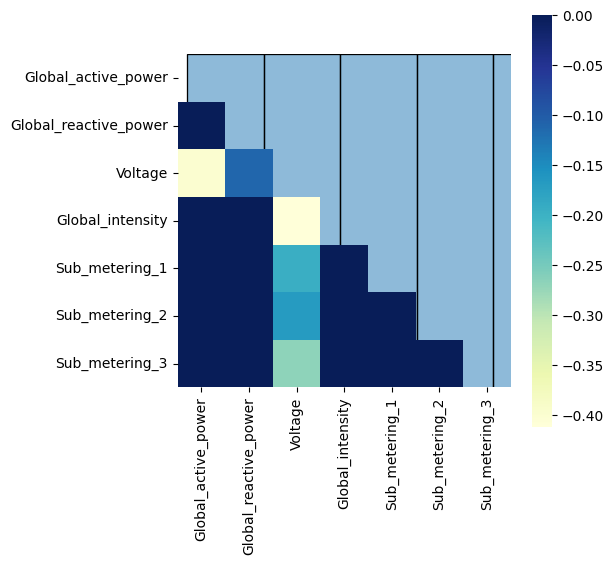

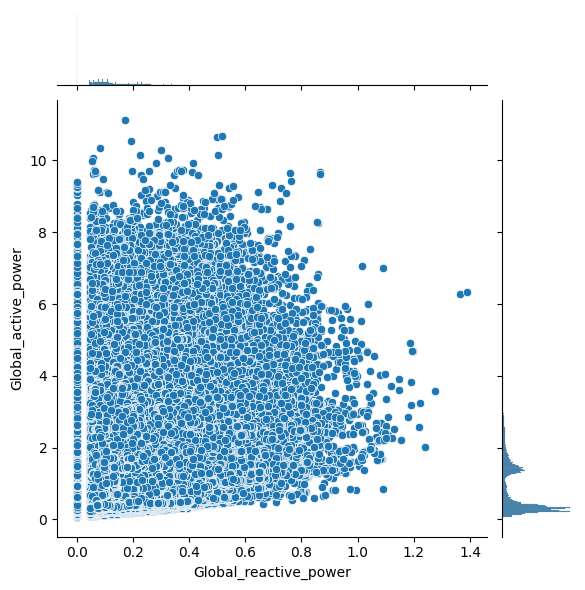

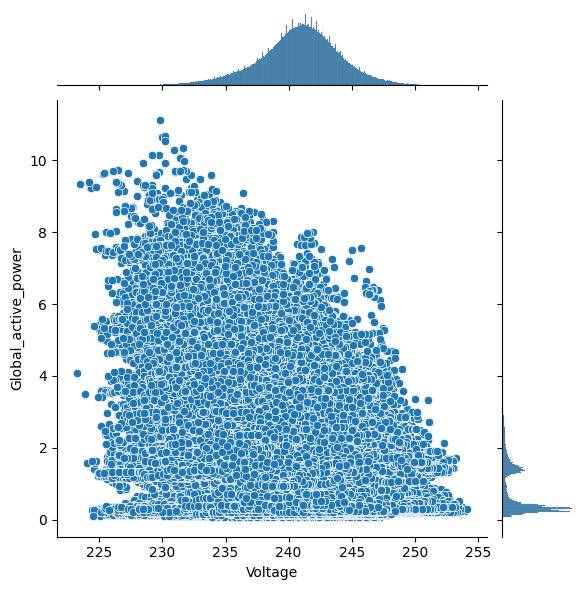

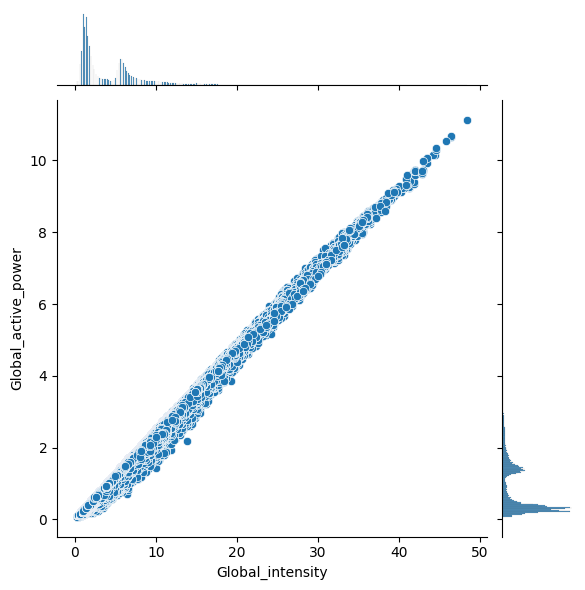

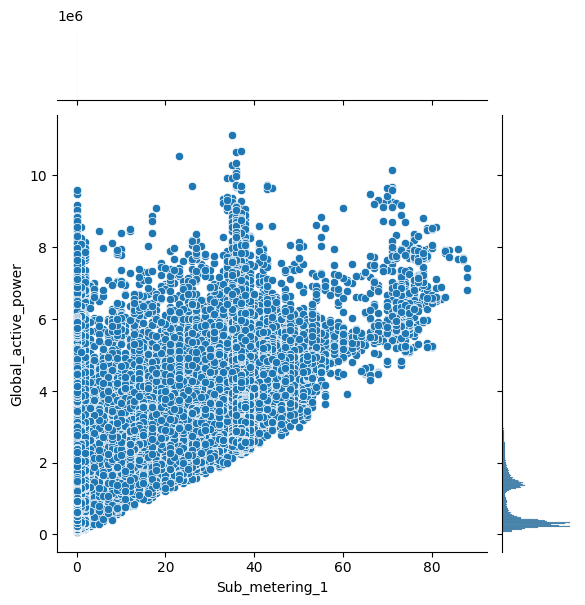

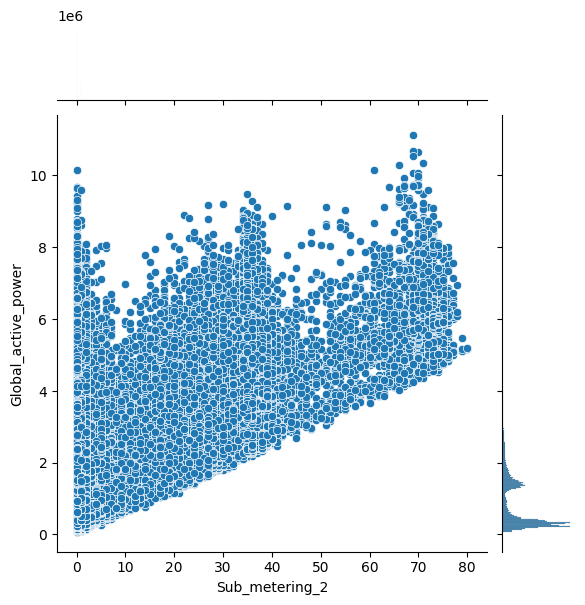

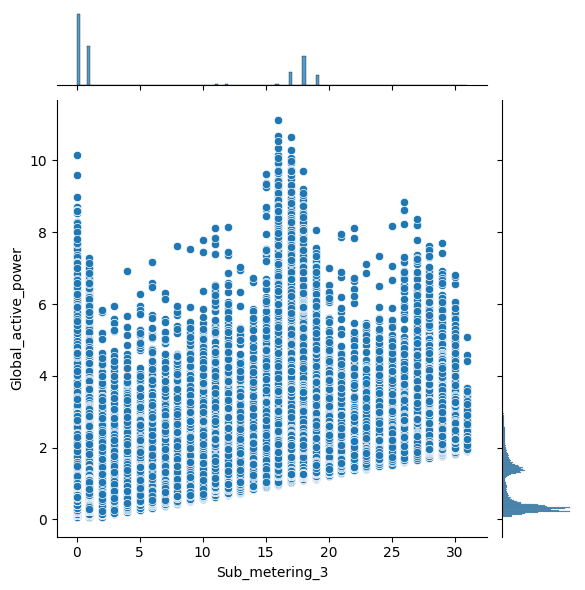

In [5]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("household_power_consumption.txt", 
                   sep=";", header=0, infer_datetime_format=True,
                   parse_dates={'datetime':[0,1]}, index_col=['datetime'])

# Replace missing values
print(data.head())

print(data.tail())

print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns")

print(data.columns)

print(data.isnull().sum())

percent_missing=data.isnull().sum() * 100 / len(data)
missing_value_df=pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df)
 
print(data.loc[data.Sub_metering_3.isnull()].head())

print(data.replace('?', np.nan, inplace=True))

print(data.loc[data.Sub_metering_3.isnull()].head())

data=data.dropna(how='all')
print(data)


# Convert all columns to float
for col in data.columns:
    data[col] = data[col].astype('float64')

sns.displot(data['Global_active_power'])

sns.displot(data['Global_active_power'],kde=False,bins=30)

sns.displot(data['Global_reactive_power'],kde=False,bins=30)

sns.displot(data['Voltage'],kde=True,bins=30)

sns.displot(data['Global_intensity'],kde=True,bins=30)

data.corr()

pearson=data.corr(method='pearson')
mask=np.zeros_like(pearson)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(pearson,vmax=0,square=True, cbar=True, cmap="YlGnBu", mask=mask)

sns.jointplot(x = 'Global_reactive_power', y = 'Global_active_power',data=data, kind = 'scatter')

sns.jointplot(x = 'Voltage', y = 'Global_active_power',data=data, kind = 'scatter')

sns.jointplot(x = 'Global_intensity', y = 'Global_active_power',data=data, kind = 'scatter')

sns.jointplot(x = 'Sub_metering_1', y = 'Global_active_power',data=data, kind = 'scatter')
sns.jointplot(x = 'Sub_metering_2', y = 'Global_active_power',data=data, kind = 'scatter')
sns.jointplot(x = 'Sub_metering_3', y = 'Global_active_power',data=data, kind = 'scatter')



# ✅ Select only the 5 features you want
X = data[['Global_reactive_power', 'Global_intensity',
          'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Target variable (example: predicting Global_active_power)
y = data['Global_active_power']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

predictions=model.predict(X_test)
print(predictions)


print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R Squares value:',metrics.r2_score(y_test,predictions))

# ✅ Save model and scaler together in ONE file (model.pkl)
with open("model.pkl", "wb") as f:
    pickle.dump({"model": model, "scaler": scaler}, f)

print("✅ Model and Scaler saved together in model.pkl")
